In [1]:
import pandas as pd
dataframe = pd.read_csv('data science.csv')

In [2]:
dataframe.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11




```
# This is formatted as code
```

Let's see how many transactions are happening for each transaction size

In [18]:
df=dataframe.groupby('user_id',as_index=False)['total_items','order_amount'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


The total items ordered by user_id 607 is 2000, and it is an outlier. It is likely that these excessively large transactions are driving up the AOV.

Let's analyse the orders of user_id 607 a bit further.

In [5]:
dataframe[dataframe['user_id']==607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


We have a few observations to make. User_id 607 is ordering 2000 items everyday, and everyday the order_amount is 704000.
Either the dataset contains duplicate entries, or this client is automating the process of purchasing shoes in quantity, which he or she will probably resell for a bigger profit.

In [8]:
dataframe['mean_order_amount']=dataframe['order_amount']/dataframe['total_items']

In [21]:
df['mean_order_amount']=df['order_amount']/df['total_items']

In [22]:
  dataframe.describe()

,order_id,shop_id,user_id,order_amount,total_items,mean_order_amount
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


We would never expect an average pair of shoes to cost $25725, so there is most likely a recording error that is replicated across the dataset.

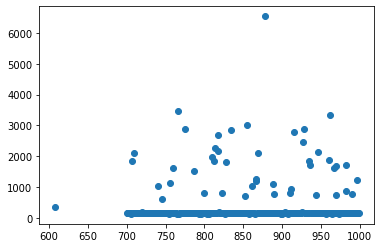

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df['user_id'],df['mean_order_amount'])

We discovered that the several extreme values in this dataset, both from the 2000 item purchases and from the suspicious order amounts that were multiples of 25725, have a significant impact on our initial evaluation metric, AOV. To safeguard our evaluation metric from the effects of these outliers, we should instead utilise a robust evaluation metric, median, which can be located amid the dark blue line's points.

In [12]:
dataframe['order_amount'].median()

284.0

**Question 1a**


We compute the average order amount without taking into consideration the number of pairs of shoes purchased in each transaction when we use the AOV. Furthermore, there are a number of transactions that appear to be suspicious or incorrect:
The AOV is being driven up by 17 identical transactions, each with 2000 purchases.
When we group transactions by total items, we observe that the highest order amounts for transaction sizes of 1, 2, 3, 4, and 6 items are unlikely multiples of 25725. The AOV is also rising as a result of these transactions.
Due to the extreme points, a robust evaluation metric (one that is unaffected by extreme values) would be desirable.



**Question 1b**

To protect our evaluation metric from the effects of extreme points it would be wise to use a robust evaluation metric: median.



**Question 1c**

The median is 284, which is a more reasonable value for our measure of central tendancy than the mean (3145.13) given that we are talking about single-transaction purchases of shoes.



**Question 2a
Answer: 54**

SELECT COUNT(*)

FROM Orders AS all_order, Shippers AS shipper

WHERE all_order.ShipperId = shipper.ShipperId AND ShipperName = "Speedy Express";

**Question 2b Answer: Handel**

SELECT customers.CustomerName, COUNT(*) AS Count

FROM Orders AS all_orders, Customers AS customers
WHERE all_orders.CustomerID = customers.CustomerID

GROUP BY all_orders.CustomerID

ORDER BY Count DESC

LIMIT 1;

**Question 2c Answer: Boston Crab Meat**

SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity

FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p
WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID

GROUP BY p.ProductID

ORDER BY TotalQuantity DESC

LIMIT 1;



